<a href="https://colab.research.google.com/github/kunalavghade/Ai/blob/main/Week_3_%E2%80%94_Perceptron%2C_Linear_Separability_%26_the_XOR_Barrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 — Perceptron, Linear Separability & the XOR Barrier

## Goal
Understand the **Perceptron**, the first neural network ever created, and deeply understand:
- Linear separability
- Why XOR breaks single-layer models
- What limitation forces us to go deeper

This week is about **intuition, geometry, and history**, not just math.

---

## 1. Historical Context

The Perceptron was introduced by Frank Rosenblatt (1957).
It is the **ancestor of all modern neural networks**.

At the time, it was believed that:
> “A single neuron can learn anything.”

This belief was later proven false.

---

## 2. Perceptron Model

The perceptron is a **binary linear classifier**.

Mathematical form:

z = w·x + b  
ŷ = step(z)

Where:
- step(z) = 1 if z ≥ 0, else 0

Unlike logistic regression:
- No probabilities
- Hard decision boundary
- Non-differentiable activation

---

## 3. Perceptron Learning Rule

Weights are updated only when the prediction is wrong.

Update rule:

w = w + η(y − ŷ)x  
b = b + η(y − ŷ)

Where:
- η = learning rate
- y = true label
- ŷ = predicted label

Key idea:
- Correct prediction → no update
- Wrong prediction → push boundary

---

## 4. Geometric Interpretation

Each update moves the decision boundary:
- Toward misclassified points
- Away from correctly classified points

Learning is **discrete and local**, not smooth like gradient descent.

---

## 5. Linear Separability

A dataset is **linearly separable** if a straight line (or hyperplane) can perfectly separate classes.

Examples:
- AND → linearly separable
- OR → linearly separable
- XOR → NOT linearly separable

This is a **fundamental limitation**, not a bug.

---

## 6. XOR Problem

XOR truth table:

x₁ | x₂ | y  
---|----|---
0  | 0  | 0  
0  | 1  | 1  
1  | 0  | 1  
1  | 1  | 0  

No single straight line can separate the classes.

This means:
- Perceptron fails
- Logistic regression fails
- Any single-layer linear model fails

---

## 7. Why Learning Fails on XOR

Because the model computes:

w₁x₁ + w₂x₂ + b

This is a **linear function**.

XOR requires a **non-linear decision boundary**.

---

## 8. The Minsky–Papert Critique

In 1969, Marvin Minsky and Seymour Papert showed:
- Perceptrons cannot solve XOR
- They cannot represent many simple patterns

This criticism caused the **first AI winter**.

Important:
> The problem was not neural networks —  
> The problem was **shallow neural networks**.

---

## 9. Key Insight of Week 3

To solve XOR, we need:
- More than one layer
- Intermediate feature transformations
- Non-linear composition

This leads to **multi-layer neural networks**.

---

## 10. Conceptual Bridge to Next Week

A two-layer network can:
- Learn internal representations
- Transform XOR into linearly separable space

This transformation is the heart of **deep learning**.

---

## Coding Questions (NumPy Only)

### Question 1: Perceptron Implementation
Implement a perceptron from scratch.

Requirements:
- Step activation
- Perceptron update rule
- No gradient descent

---

### Question 2: Linearly Separable Data
Train your perceptron on:
- AND gate
- OR gate

Verify:
- Convergence
- Stable predictions

---

### Question 3: XOR Failure
Train the same perceptron on XOR dataset.

Observe:
- Training behavior
- Oscillating updates
- Failure to converge

Explain in comments.

---

### Question 4: Visualization
For 2D data:
- Plot data points
- Plot decision boundary
- Show misclassified points

---

### Question 5: Comparison Study
Write a short comparison:
- Perceptron vs Logistic Regression
- Learning rule differences
- Loss-based vs rule-based learning

---

### Question 6: Conceptual (Write Answers)
1. What does linear separability mean?
2. Why does XOR break single-layer models?
3. Why doesn’t increasing epochs help?
4. What fundamental change is needed to fix this?

---

## Outcome of Week 3

After completing this week, you should:
- Understand why shallow models fail
- Clearly visualize decision boundaries
- Know exactly why depth matters
- Be mentally ready for backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Question 1: Perceptron Implementation (From Scratch)**

Step Activation

In [2]:
def step(z):
  return np.where(z >= 0, 1, 0)

Perceptron Class

In [3]:
class Perceptron:
  def __init__(self, lr = 0.1, epochs= 50) -> None:
    self.lr = lr
    self.epochs = epochs

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.W = np.zeros(n_features)
    self.b = 0

    for epoch in range(self.epochs):
      errors = 0;
      for i in range(n_samples):
        z = X[i] @ self.W + self.b
        y_pred = step(z)

        update = self.lr * (y[i] - y_pred)
        self.W += update * X[i]
        self.b += update
        errors += 1

      if errors == 0:
        print(f"Converged at epoch {epoch}")
        break

  def predict(self, X):
    return step(X @ self.W + self.b)


**Question 2: Linearly Separable Data (AND / OR)**

AND Gate

In [4]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])

p_and = Perceptron(lr=0.1, epochs=50)
p_and.fit(X, y_and)

print("AND predictions:", p_and.predict(X))

AND predictions: [0 0 0 1]


OR Gate

In [5]:
y_or = np.array([0, 1, 1, 1])

p_or = Perceptron(lr=0.1, epochs=50)
p_or.fit(X, y_or)

print("OR predictions:", p_or.predict(X))

OR predictions: [0 1 1 1]


Question 3: XOR Failure

In [6]:
y_xor = np.array([0, 1, 1, 0])

p_xor = Perceptron(lr=0.1, epochs=50)
p_xor.fit(X, y_xor)

print("XOR predictions:", p_xor.predict(X))

XOR predictions: [1 1 0 0]


XOR is not linearly separable.
Perceptron updates keep chasing misclassified points.
No single straight line can satisfy all constraints.

**Question 4: Visualization (Decision Boundary + Errors)**

In [11]:
def plot_perceptron_boundary(model, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)

    predictions = model.predict(X)
    misclassified = predictions != y

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=100)
    plt.scatter(
        X[misclassified, 0],
        X[misclassified, 1],
        facecolors='none',
        edgecolors='red',
        s=200,
        label='Misclassified'
    )

    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

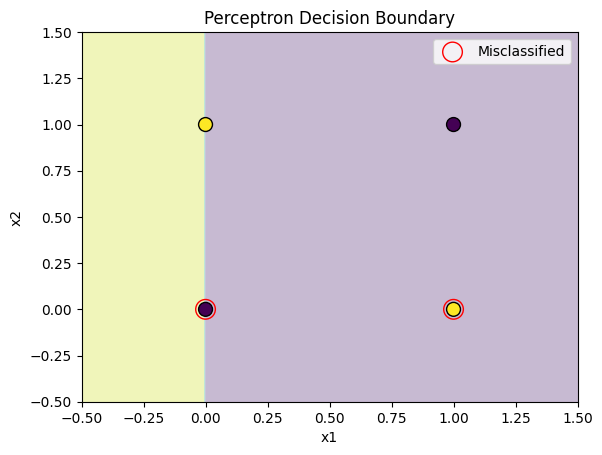

In [12]:
plot_perceptron_boundary(p_xor, X, y_xor)

## Perceptron vs Logistic Regression

| Aspect | Perceptron | Logistic Regression |
|------|-----------|--------------------|
| Output | Hard class (0 / 1) | Probability (0 – 1) |
| Activation | Step function | Sigmoid function |
| Learning | Rule-based updates | Loss-based optimization |
| Updates | Discrete, conditional | Continuous (gradient descent) |
| Differentiable | ❌ No | ✅ Yes |
| XOR Solvable | ❌ No | ❌ No |

**Key Insight:**  
Both perceptron and logistic regression are **linear classifiers**.  
The sigmoid function improves *learning*, not *representational power*.  
As a result, **both models fail on XOR**, which requires non-linear decision boundaries and hidden layers.